In [265]:
#from google.colab import drive
#drive.mount('/content/drive')

In [266]:
import pandas as pd
import numpy as np

In [267]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [268]:
df = pd.read_csv("/content/drive/MyDrive/agroclimatic_clusters.csv")

In [269]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [270]:
df['cluster15'].value_counts()

5     89280
11    62496
4     55800
7     55056
14    31992
1     29760
8     27528
2     24552
9     22320
12    14136
0     10416
13     6696
6      5952
3      4464
10     1488
Name: cluster15, dtype: int64

In [271]:
a = []
for i in range(len(df)):
    if df['cluster15'][i]!=11:
        a.append(i)

In [272]:
df = df.drop(a)

In [273]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
7440,1958,1,5,28.9,14.1,48,-0.2,maharashtra,bhandara,3,11,2,10,11,12,9,0
7441,1958,2,1,31.9,15.6,50,-0.2,maharashtra,bhandara,3,11,2,10,11,12,9,0
7442,1958,3,16,36.1,19.4,50,-0.7,maharashtra,bhandara,3,11,2,10,11,12,9,0
7443,1958,4,20,40.1,24.8,38,-0.6,maharashtra,bhandara,3,11,2,10,11,12,9,0
7444,1958,5,1,43.3,29.0,13,-0.9,maharashtra,bhandara,3,11,2,10,11,12,9,0


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62496 entries, 7440 to 436727
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            62496 non-null  int64  
 1   Month           62496 non-null  int64  
 2   ppt(mm)         62496 non-null  int64  
 3   tmax(degC)      62496 non-null  float64
 4   tmin(degC)      62496 non-null  float64
 5   aet(mm)         62496 non-null  int64  
 6   PDSI(unitless)  62496 non-null  float64
 7   state           62496 non-null  object 
 8   district        62496 non-null  object 
 9   cluster14       62496 non-null  int64  
 10  cluster15       62496 non-null  int64  
 11  cluster18       62496 non-null  int64  
 12  cluster20       62496 non-null  int64  
 13  cluster25       62496 non-null  int64  
 14  cluster27       62496 non-null  int64  
 15  cluster30       62496 non-null  int64  
 16  cluster35       62496 non-null  int64  
dtypes: float64(3), int64(12), o

In [275]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(62496, 8)

In [276]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [277]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
7440,1958,1,5,28.9,14.1,48,-0.2,bhandara,1-1958
7441,1958,2,1,31.9,15.6,50,-0.2,bhandara,2-1958
7442,1958,3,16,36.1,19.4,50,-0.7,bhandara,3-1958
7443,1958,4,20,40.1,24.8,38,-0.6,bhandara,4-1958
7444,1958,5,1,43.3,29.0,13,-0.9,bhandara,5-1958


In [278]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [279]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
7440,1958,1,5,28.9,14.1,48,-0.2,bhandara,1958-01-01,1
7441,1958,2,1,31.9,15.6,50,-0.2,bhandara,1958-02-01,1
7442,1958,3,16,36.1,19.4,50,-0.7,bhandara,1958-03-01,1
7443,1958,4,20,40.1,24.8,38,-0.6,bhandara,1958-04-01,1
7444,1958,5,1,43.3,29.0,13,-0.9,bhandara,1958-05-01,1


In [280]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
7440,1958,1,5,48,-0.2,bhandara,1958-01-01,1,21.50
7441,1958,2,1,50,-0.2,bhandara,1958-02-01,1,23.75
7442,1958,3,16,50,-0.7,bhandara,1958-03-01,1,27.75
7443,1958,4,20,38,-0.6,bhandara,1958-04-01,1,32.45
7444,1958,5,1,13,-0.9,bhandara,1958-05-01,1,36.15


In [281]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
436723,2019,8,377,106,-4.1,baragarh,2019-08-01,1,28.15
436724,2019,9,463,92,-0.9,baragarh,2019-09-01,1,27.80
436725,2019,10,151,98,4.6,baragarh,2019-10-01,1,27.00
436726,2019,11,0,61,4.3,baragarh,2019-11-01,1,23.55
436727,2019,12,4,50,4.2,baragarh,2019-12-01,1,21.40


In [282]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,ppt(mm),y,aet(mm),district
0,1981-01-01,18,19.70,47,bhandara
1,1981-02-01,0,24.20,38,bhandara
2,1981-03-01,36,26.95,59,bhandara
3,1981-04-01,8,32.25,22,bhandara
4,1981-05-01,12,35.25,21,bhandara


In [283]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
8172,2019,1,19,49,-1.4,bhandara,2019-01-01,1,19.35
8173,2019,2,2,38,-1.5,bhandara,2019-02-01,1,23.00
8174,2019,3,20,48,-1.5,bhandara,2019-03-01,1,27.40
8175,2019,4,3,19,-1.8,bhandara,2019-04-01,1,32.40
8176,2019,5,1,11,-2.0,bhandara,2019-05-01,1,37.60
...,...,...,...,...,...,...,...,...,...
436723,2019,8,377,106,-4.1,baragarh,2019-08-01,1,28.15
436724,2019,9,463,92,-0.9,baragarh,2019-09-01,1,27.80
436725,2019,10,151,98,4.6,baragarh,2019-10-01,1,27.00
436726,2019,11,0,61,4.3,baragarh,2019-11-01,1,23.55


In [284]:
from fbprophet import Prophet

In [285]:

model = Prophet()

In [286]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [287]:
train.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [288]:
train.tail()


,ds,ppt(mm),y,aet(mm),district
38299,2018-08-01,391,27.80,96,baragarh
38300,2018-09-01,344,27.70,108,baragarh
38301,2018-10-01,42,27.00,87,baragarh
38302,2018-11-01,2,23.25,53,baragarh
38303,2018-12-01,5,20.30,47,baragarh


In [289]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [290]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [291]:

forecast = model.predict(fut)

In [292]:
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,24.772819,21.766804,30.488698,24.770294,24.777637,1.233731,1.233731,1.233731,1.233731,1.233731,1.233731,0.0,0.0,0.0,26.006549
465,2019-09-30,24.770287,20.599954,28.997601,24.766675,24.776866,0.111117,0.111117,0.111117,0.111117,0.111117,0.111117,0.0,0.0,0.0,24.881404
466,2019-10-31,24.767671,16.961115,25.846188,24.763025,24.775684,-3.372148,-3.372148,-3.372148,-3.372148,-3.372148,-3.372148,0.0,0.0,0.0,21.395523
467,2019-11-30,24.765139,13.654174,21.987238,24.759163,24.774583,-6.984430,-6.984430,-6.984430,-6.984430,-6.984430,-6.984430,0.0,0.0,0.0,17.780710
468,2019-12-31,24.762523,13.042385,21.525683,24.755219,24.773349,-7.295860,-7.295860,-7.295860,-7.295860,-7.295860,-7.295860,0.0,0.0,0.0,17.466663


In [293]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,26.006549,21.766804,30.488698
465,2019-09-30,24.881404,20.599954,28.997601
466,2019-10-31,21.395523,16.961115,25.846188
467,2019-11-30,17.780710,13.654174,21.987238
468,2019-12-31,17.466663,13.042385,21.525683


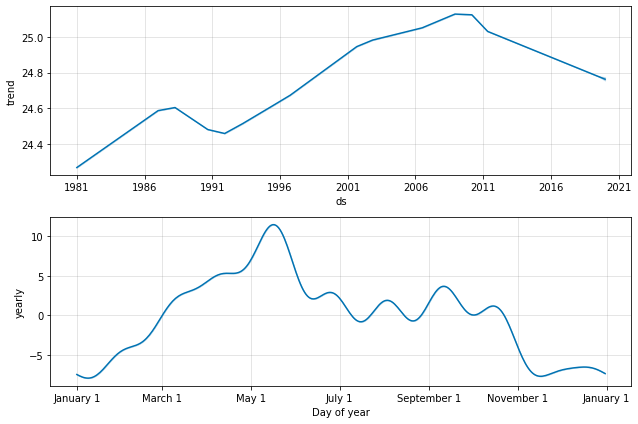

In [294]:
fig2 = model.plot_components(forecast)

In [295]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

(12, 1) (1008, 1)
22.198627582009653


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,mid_temp,Month,yhat
0,19.35,1,20.137280
1,11.40,1,20.137280
2,15.85,1,20.137280
3,18.60,1,20.137280
4,15.40,1,20.137280
...,...,...,...
1003,19.70,12,17.466663
1004,23.40,12,17.466663
1005,18.20,12,17.466663
1006,21.05,12,17.466663


In [296]:
import matplotlib.pyplot as plt

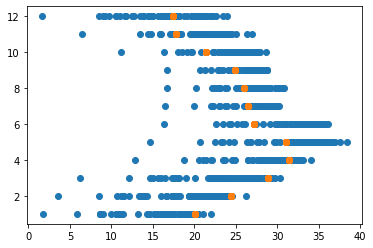

In [297]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()


In [298]:
import pickle

In [299]:
filename = 'Cluster 15 - 11.sav'
pickle.dump(model, open(filename, 'wb'))

In [300]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(fut)

In [301]:
result.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,24.268985,12.564594,20.816520,24.268985,24.268985,-7.470337,-7.470337,-7.470337,-7.470337,-7.470337,-7.470337,0.0,0.0,0.0,16.798648
1,1981-02-01,24.273484,15.477637,24.060315,24.273484,24.273484,-4.470108,-4.470108,-4.470108,-4.470108,-4.470108,-4.470108,0.0,0.0,0.0,19.803376
2,1981-03-01,24.277549,20.057536,28.394071,24.277549,24.277549,0.037910,0.037910,0.037910,0.037910,0.037910,0.037910,0.0,0.0,0.0,24.315459
3,1981-04-01,24.282048,24.444040,33.085035,24.282048,24.282048,4.299889,4.299889,4.299889,4.299889,4.299889,4.299889,0.0,0.0,0.0,28.581937
4,1981-05-01,24.286403,27.258320,35.162682,24.286403,24.286403,7.035797,7.035797,7.035797,7.035797,7.035797,7.035797,0.0,0.0,0.0,31.322200
